# Images and convolutional networks

In this notebook, we'll cover the use of convolutional neural networks for image classification.

## Preamble: GPUs

Since these networks widely benefit from computations on GPU, you could be curious about whether GPUs will be used for the computations at stake in this notebook.

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2023-07-18 14:50:43.806941: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-07-18 14:50:43.806956: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-07-18 14:50:43.806961: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-07-18 14:50:43.806990: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-18 14:50:43.807004: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


If you are using Google Colab and no GPU is found, enable GPUs for the notebook as follows:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

and restart the notebook.

By default, all operations in `keras` are run on GPU if a GPU is found.
If no GPU is available, the code runs on CPU without requiring any adaptation.

## Fully connected networks (Multi Layer Perceptrons)

You will first experiment with multi-layer perceptrons to get used to the basics of model definition and training in `keras`.


**Question 1.** Import the MNIST dataset and make sure it has the correct shape to feed a MLP (i.e. the dataset should 
have dimensions $(n, p)$ where $n$ is the number of images in the set, $p=w \times h\times c$ is the number of features, $w$ and $h$ are the width and height of an 
image and $c$ its number of channels: 1 for black & white images and 3 for RGB ones).

In [2]:
import keras_core as keras
from keras.datasets import mnist
from keras.utils import to_categorical

def prepare_mnist_mlp():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train / 255.
    x_test = x_test / 255.
    x_train = x_train.reshape((-1, 28 * 28))
    x_test = x_test.reshape((-1, 28 * 28))
    
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = prepare_mnist_mlp()

Using TensorFlow backend


In [3]:
print(x_train.shape, y_train.shape)
print(y_train[1])

(60000, 784) (60000, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


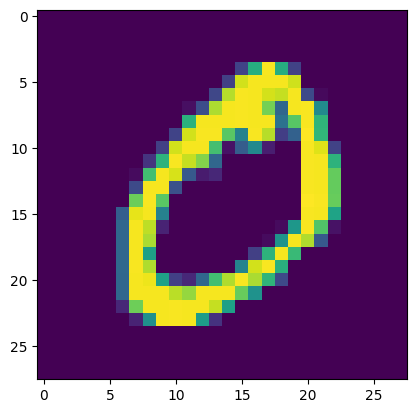

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(x_train[1].reshape((28, 28)))

To define an MLP, you will need (at least) the following layers:
* [`InputLayer`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/InputLayer)
* [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

**Question 2.** Implement an MLP with a single hidden layer made of 128 neurons. Show the number of parameters of this network (using `model.count_params()` or `model.summary()`) and evaluate its performance on MNIST test data.

In [5]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense

model = Sequential([
    InputLayer(input_shape=(784, )),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_split=.3)

2023-07-18 14:50:44.320336: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-18 14:50:44.320351: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2023-07-18 14:50:44.906535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


416/420 [============================>.] - ETA: 0s - loss: 0.4332 - accuracy: 0.8784

2023-07-18 14:50:48.741851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


420/420 [==============================] - 5s 8ms/step - loss: 0.4321 - accuracy: 0.8786 - val_loss: 0.3105 - val_accuracy: 0.9132
Epoch 2/10
420/420 [==============================] - 4s 9ms/step - loss: 0.2996 - accuracy: 0.9143 - val_loss: 0.3062 - val_accuracy: 0.9134
Epoch 3/10
420/420 [==============================] - 4s 8ms/step - loss: 0.2867 - accuracy: 0.9200 - val_loss: 0.3003 - val_accuracy: 0.9178
Epoch 4/10
420/420 [==============================] - 4s 9ms/step - loss: 0.2800 - accuracy: 0.9204 - val_loss: 0.2941 - val_accuracy: 0.9214
Epoch 5/10
420/420 [==============================] - 4s 8ms/step - loss: 0.2775 - accuracy: 0.9219 - val_loss: 0.2956 - val_accuracy: 0.9229
Epoch 6/10
420/420 [==============================] - 3s 8ms/step - loss: 0.2773 - accuracy: 0.9229 - val_loss: 0.3340 - val_accuracy: 0.9072
Epoch 7/10
420/420 [==============================] - 4s 8ms/step - loss: 0.2787 - accuracy: 0.9214 - val_loss: 0.3090 - val_accuracy: 0.9175
Epoch 8/10
420/42

In [6]:
print(h.history)

{'loss': [0.4320562779903412, 0.29958221316337585, 0.2867211699485779, 0.2800214886665344, 0.27753356099128723, 0.277260959148407, 0.27865320444107056, 0.27517014741897583, 0.27723750472068787, 0.2783828377723694], 'accuracy': [0.8786190748214722, 0.9143333435058594, 0.9199761748313904, 0.9203809499740601, 0.9218809604644775, 0.9228571653366089, 0.9214047789573669, 0.9227142930030823, 0.9216190576553345, 0.9236428737640381], 'val_loss': [0.31048861145973206, 0.306199312210083, 0.30031123757362366, 0.2941177785396576, 0.2956400513648987, 0.33402958512306213, 0.309017539024353, 0.3257444500923157, 0.3140314221382141, 0.3082728385925293], 'val_accuracy': [0.9131666421890259, 0.913444459438324, 0.9178333282470703, 0.9214444160461426, 0.9228888750076294, 0.9072222113609314, 0.9175000190734863, 0.9117777943611145, 0.9192222356796265, 0.917722225189209]}


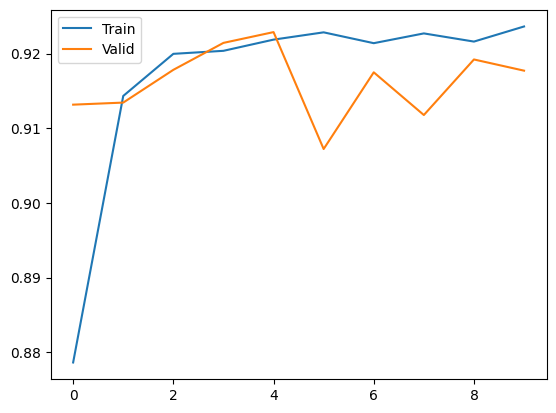

In [7]:
plt.plot(h.history["accuracy"], label="Train")
plt.plot(h.history["val_accuracy"], label="Valid")
plt.legend();

In [8]:
model.evaluate(x_test, y_test)

  9/313 [..............................] - ETA: 2s - loss: 0.1916 - accuracy: 0.9583 

2023-07-18 14:51:22.605410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 0.2929 - accuracy: 0.9186


[0.29293370246887207, 0.9186000227928162]

## LeNet and variants (shallow CNNs)

You will now experiment with rather shallow convolutional networks to get used to typical layers used in CNNs.


**Question 3.** Import the MNIST dataset and make sure it has the correct shape to feed a CNN (i.e. the dataset should 
have dimensions $(n, w, h, c)$ where $n$ is the number of images in the set, $w$ and $h$ are the width and height of an 
image and $c$ its number of channels: 1 for black & white images and 3 for RGB ones).

In [9]:
from keras.datasets import mnist
from keras.utils import to_categorical

def prepare_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train / 255.
    x_test = x_test / 255.
    x_train = x_train.reshape((-1, 28, 28, 1))
    x_test = x_test.reshape((-1, 28, 28, 1))
    
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = prepare_mnist()

To define a CNN, you will need (at least) the following layers:
* [`Conv2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
* [`MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)
* [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)

**Question 4.** Implement a CNN with a single convolutional layer followed by a max-pooling and a fully-connected layer. Show the number of parameters of these networks and evaluate its performance on MNIST test data.

In [10]:
from keras.layers import Conv2D, MaxPool2D, Flatten

model = Sequential([
    InputLayer(input_shape=(28, 28, 1)),
    Conv2D(filters=128, kernel_size=5, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_split=.3)

Epoch 1/10


2023-07-18 14:51:25.816420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


420/420 [==============================] - ETA: 0s - loss: 0.2438 - accuracy: 0.9311

2023-07-18 14:51:30.748292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


420/420 [==============================] - 6s 13ms/step - loss: 0.2438 - accuracy: 0.9311 - val_loss: 0.0962 - val_accuracy: 0.9721
Epoch 2/10
420/420 [==============================] - 5s 13ms/step - loss: 0.0713 - accuracy: 0.9795 - val_loss: 0.0671 - val_accuracy: 0.9798
Epoch 3/10
420/420 [==============================] - 5s 13ms/step - loss: 0.0492 - accuracy: 0.9854 - val_loss: 0.0739 - val_accuracy: 0.9774
Epoch 4/10
420/420 [==============================] - 5s 13ms/step - loss: 0.0394 - accuracy: 0.9881 - val_loss: 0.0588 - val_accuracy: 0.9829
Epoch 5/10
420/420 [==============================] - 5s 13ms/step - loss: 0.0319 - accuracy: 0.9902 - val_loss: 0.0581 - val_accuracy: 0.9831
Epoch 6/10
420/420 [==============================] - 5s 13ms/step - loss: 0.0265 - accuracy: 0.9920 - val_loss: 0.0598 - val_accuracy: 0.9823
Epoch 7/10
420/420 [==============================] - 5s 12ms/step - loss: 0.0218 - accuracy: 0.9933 - val_loss: 0.0535 - val_accuracy: 0.9844
Epoch 8/10

**Question 5.** Implement the following network (leNet):

![leNet model](https://github.com/rtavenar/deep-notebooks/raw/main/assets/convnet_fig.svg)

Compare its performance to that of the fully connected model you have defined in the first section of this notebook.

In [11]:
model = Sequential([
    InputLayer(input_shape=(28, 28, 1)),
    Conv2D(filters=6, kernel_size=5, activation="relu", padding="valid"),
    MaxPool2D(pool_size=2),
    Conv2D(filters=16, kernel_size=5, activation="relu", padding="valid"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(120, activation="relu"),
    Dense(84, activation="relu"),
    Dense(10, activation="softmax")
])
# model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_split=.3)

Epoch 1/10


2023-07-18 14:52:19.947705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


414/420 [============================>.] - ETA: 0s - loss: 0.3648 - accuracy: 0.8913

2023-07-18 14:52:24.054289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


420/420 [==============================] - 5s 11ms/step - loss: 0.3611 - accuracy: 0.8924 - val_loss: 0.1307 - val_accuracy: 0.9599
Epoch 2/10
420/420 [==============================] - 5s 11ms/step - loss: 0.1060 - accuracy: 0.9683 - val_loss: 0.1053 - val_accuracy: 0.9678
Epoch 3/10
420/420 [==============================] - 5s 11ms/step - loss: 0.0886 - accuracy: 0.9742 - val_loss: 0.0996 - val_accuracy: 0.9724
Epoch 4/10
420/420 [==============================] - 5s 11ms/step - loss: 0.0921 - accuracy: 0.9740 - val_loss: 0.1232 - val_accuracy: 0.9722
Epoch 5/10
420/420 [==============================] - 5s 12ms/step - loss: 0.1360 - accuracy: 0.9701 - val_loss: 0.2395 - val_accuracy: 0.9589
Epoch 6/10
420/420 [==============================] - 5s 11ms/step - loss: 0.3130 - accuracy: 0.9627 - val_loss: 0.5773 - val_accuracy: 0.9507
Epoch 7/10
420/420 [==============================] - 4s 11ms/step - loss: 0.8244 - accuracy: 0.9578 - val_loss: 2.0930 - val_accuracy: 0.9427
Epoch 8/10

## Image classification with ResNet models

A very efficient way to perform real-world image classification is to rely on a pretrained model.
`keras` provides models trained on ImageNet.
In this section, you will use `ResNet50` to classify images you will provide.

**Question 6.** Adapt the following code (that comes from [`keras` docs](https://keras.io/applications/#usage-examples-for-image-classification-models)) to classify a kangaroo image that you will first upload in the notebook files.

In [12]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'kangaroo.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

2023-07-18 14:53:07.945065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Predicted: [('n01877812', 'wallaby', 0.903277), ('n02423022', 'gazelle', 0.046046585), ('n02417914', 'ibex', 0.015806748)]


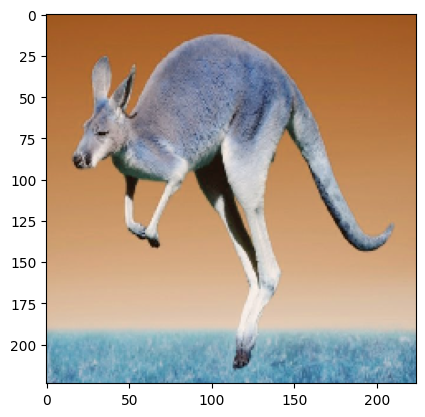

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow((x[0] - x.min()) / (x.max() - x.min()));

## Fine-tuning a model to your data

Very often, however, your image classification problem will not match ImageNet classes.
In such cases, a typical strategy consists in fine-tuning an existing model to your problem.
This is done by learning only the fully connected layers at the ouput of the model and keep other layers freezed.

When loading weights from a pretrained model, `keras` offers an option to remove the classification layers and freeze weights of the convolutional layers:

```python
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])
for layer in base_model.layers:
  layer.trainable = False
```

Note that here, we provide the image shape when re-building the `ResNet50` model so that, if that shape is not the one of ImageNet images, `keras` will still be able to compute all tensor shapes in the network automatically.

From that point, `base_model` can be used in a `Sequential` model as if it were a single layer, which makes it feasible to plug new layers at the output of the `ResNet50` convolutions.

### The dataset

In this notebook, you will work with a new dataset that cannot be loaded via `keras.datasets` module.
Depending in the platform on which you run this notebook, you will have to follow different guidelines to prepare the required files for the following steps.

Download the `cats_and_dogs.zip`file  (and optionally upload it to your Google Colab project) and execute the code below:

In [14]:
!unzip -o cats_and_dogs.zip

Archive:  cats_and_dogs.zip
  inflating: __MACOSX/._cats_and_dogs  
  inflating: cats_and_dogs/.DS_Store  
  inflating: __MACOSX/cats_and_dogs/._.DS_Store  
  inflating: __MACOSX/cats_and_dogs/._test_catdog  
  inflating: __MACOSX/cats_and_dogs/._train_catdog  
  inflating: cats_and_dogs/.DS_Store.gz  
  inflating: __MACOSX/cats_and_dogs/._.DS_Store.gz  
  inflating: cats_and_dogs/test_catdog/dog.365.jpg  
  inflating: __MACOSX/cats_and_dogs/test_catdog/._dog.365.jpg  
  inflating: cats_and_dogs/test_catdog/dog.403.jpg  
  inflating: __MACOSX/cats_and_dogs/test_catdog/._dog.403.jpg  
  inflating: cats_and_dogs/test_catdog/dog.417.jpg  
  inflating: __MACOSX/cats_and_dogs/test_catdog/._dog.417.jpg  
  inflating: cats_and_dogs/test_catdog/dog.371.jpg  
  inflating: __MACOSX/cats_and_dogs/test_catdog/._dog.371.jpg  
  inflating: cats_and_dogs/test_catdog/dog.359.jpg  
  inflating: __MACOSX/cats_and_dogs/test_catdog/._dog.359.jpg  
  inflating: cats_and_dogs/test_catdog/cat.359.jpg  
  inf

Now, whatever your platform, run the cell below:

In [15]:
!ls './cats_and_dogs/'

test_catdog  train_catdog


The last line of the output above should be:
```
test_catdog  train_catdog
```

Then the data should be loaded using the following functions:

In [16]:
import os

def load_cats_and_dogs_folder(path, target_size=None, verbose=True):
    X = []
    y = []
    i = 0
    for fname in os.listdir(path):
        if 'cat' in fname:
            X.append(
                np.array(image.load_img(path+fname, target_size=target_size))
            )
            y.append(0)
        elif 'dog' in fname:
            X.append(
                np.array(image.load_img(path+fname, target_size=target_size))
            )
            y.append(1)
        i+=1
        if verbose and i % 50 == 0:
            print('{0:.2f} % loaded'.format(100*(i/len(os.listdir(path)))))
    return np.array(X), np.array(y)

def load_preprocessed_cats_and_dogs(base_folder, target_size=None, 
                                    verbose=True):
    if verbose:
        print("Loading training set")
    X_train, y_train = load_cats_and_dogs_folder(base_folder + "/train_catdog/", 
                                                 target_size=target_size,
                                                 verbose=verbose)
    X_train = preprocess_input(X_train)

    if verbose:
        print("Loading test set")
    X_test, y_test = load_cats_and_dogs_folder(base_folder + "/test_catdog/", 
                                               target_size=target_size,
                                               verbose=verbose)
    X_test = preprocess_input(X_test)

    return X_train, X_test, y_train, y_test

# The call is here:
X_train, X_test, y_train, y_test = load_preprocessed_cats_and_dogs('./cats_and_dogs/', target_size=(200, 200))

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) 

Loading training set
9.96 % loaded
19.92 % loaded
29.88 % loaded
39.84 % loaded
49.80 % loaded
59.76 % loaded
69.72 % loaded
79.68 % loaded
89.64 % loaded
99.60 % loaded
Loading test set
10.00 % loaded
20.00 % loaded
30.00 % loaded
40.00 % loaded
50.00 % loaded
60.00 % loaded
70.00 % loaded
80.00 % loaded
90.00 % loaded
100.00 % loaded
(502, 200, 200, 3) (502,) (500, 200, 200, 3) (500,)


### The model

**Question 7.** Now you will:

1. use convolution layers from a pre-trained `ResNet50` model and freeze them;
2. plug an additional logistic regression layer;
3. compile the full model;
4. observe the performance of such a model on your Cat vs Dog problem.

In [17]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])
for layer in base_model.layers:
  layer.trainable = False
  
modele_complet = Sequential([
    base_model,
    Flatten(),
    Dense(1, activation="sigmoid")
])
modele_complet.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
modele_complet.fit(X_train, y_train, epochs=3, batch_size=50)

Epoch 1/3


2023-07-18 14:53:13.547821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 4s 142ms/step - loss: 0.4319 - accuracy: 0.9104
Epoch 2/3
11/11 [==============================] - 1s 67ms/step - loss: 0.2099 - accuracy: 0.9701
Epoch 3/3
11/11 [==============================] - 1s 67ms/step - loss: 0.1948 - accuracy: 0.9821


In [18]:
modele_complet.evaluate(X_test, y_test)

2023-07-18 14:53:18.452079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 70ms/step - loss: 0.2857 - accuracy: 0.9720


[0.2857338786125183, 0.972000002861023]

**Question 8.** Starting from the model you got at the previous stage, fine-tune _all_ the weights in this model
(even the convolution ones) using a learning rate of .00001 (1e-5). See if this improves on performance.

In [19]:
from keras.optimizers import Adam

for layer in base_model.layers:
  layer.trainable = True
modele_complet.compile(optimizer=Adam(learning_rate=1e-5), loss="binary_crossentropy", metrics=["accuracy"])
modele_complet.fit(X_train, y_train, epochs=3, batch_size=50)

Epoch 1/3


2023-07-18 14:53:21.975194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 13s 551ms/step - loss: 0.0790 - accuracy: 0.9861
Epoch 2/3
11/11 [==============================] - 3s 241ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 3/3
11/11 [==============================] - 3s 256ms/step - loss: 5.0842e-05 - accuracy: 1.0000
